# Decision Tree classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import graphviz
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

https://youtu.be/_L39rN6gz7Y?si=9ChJbb1XQa9XtBQM
statquest decision tree video
good explaination
---------------------
https://tungmphung.com/information-gain-gain-ratio-and-gini-index/

excellent info about information gain, entropy, gini index, gini ratio

https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html#:~:text=The%20decision%20tree%20splits%20the,in%20most%20homogeneous%20sub%2Dnodes.&text=The%20ID3%20algorithm%20builds%20decision,possible%20branches%20with%20no%20backtracking


decision tree good info

In [2]:
titanic_ds = pd.read_csv('titanic.csv')
print(titanic_ds.head())
target = titanic_ds['Survived']
titanic_ds = titanic_ds.drop(columns= ['PassengerId','Name','SibSp','Parch','Ticket','Embarked',
                                       'Cabin','Survived'],
                             errors = 'ignore')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print('Target Variable : \n',target)
print()
print('Training ds: \n',titanic_ds)


Target Variable : 
 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Training ds: 
      Pclass     Sex   Age     Fare
0         3    male  22.0   7.2500
1         1  female  38.0  71.2833
2         3  female  26.0   7.9250
3         1  female  35.0  53.1000
4         3    male  35.0   8.0500
..      ...     ...   ...      ...
886       2    male  27.0  13.0000
887       1  female  19.0  30.0000
888       3  female   NaN  23.4500
889       1    male  26.0  30.0000
890       3    male  32.0   7.7500

[891 rows x 4 columns]


In [4]:
#converting sex feature to number
titanic_ds = pd.get_dummies(data = titanic_ds,columns = ['Sex'],drop_first = True)
titanic_ds


,Pclass,Age,Fare,Sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [5]:
print('unique values in the Pclass column: \n', np.unique(titanic_ds['Pclass']))
print(np.unique(titanic_ds['Age']))
print(np.unique(titanic_ds['Fare']))
print(np.unique(titanic_ds['Sex_male']))
print()
print('no.of missing values in age coulumn: \n',titanic_ds['Age'].isna().sum())


unique values in the Pclass column: 
 [1 2 3]
[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.     nan]
[  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.158

In [6]:
age_median = titanic_ds['Age'].mean()
titanic_ds['Age'].fillna(age_median,inplace = True)
titanic_ds
#median accuracy - 76.5
#mean accuarcyy - 77.6
print('no.of missing values in age coulumn: \n',titanic_ds['Age'].isna().sum())

no.of missing values in age coulumn: 
 0


In [7]:
Dt_clf = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=6)

X_train,X_test,y_train,y_test = train_test_split(titanic_ds,target,test_size=0.2,random_state =10) 
Dt_clf.fit(X_train,y_train)
Dt_clf.score(X_test,y_test)

0.8491620111731844

### Results:

#with min_samples_leaf(indicates the minimum number of samples to be in the leaf) default = 1

#filled na values with mean and used criterion = entropy got 78.77 accuracy

#filled na values with mean and used criterion = gini got 79.33 accuracy

#with min_samples_leaf = 3
#filled na values with mean and used criterion = gini got 80.44 accuracy

#with min_samples_leaf = 5
#filled na values with mean and used criterion = gini got 82.68 accuracy

#with min_samples_leaf = 6
#filled na values with mean and used criterion = gini got 85.47 accuracy

#with min_samples_leaf = 7
#filled na values with mean and used criterion = gini got 82.68 accuracy

#used min_samples_split but no use instead if we are increasing it, it's reducing the accuracy

### sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Parameters:

'y_true':array-like of shape (n_samples,)
Ground truth (correct) target values.

'y_pred':array-like of shape (n_samples,)
Estimated targets as returned by a classifier.

'labels':array-like of shape (n_classes), default=None
List of labels to index the matrix. This may be used to reorder or select a subset of labels. If None is given, those that appear at least once in y_true or y_pred are used in sorted order.

'sample_weight':array-like of shape (n_samples,), default=None
Sample weights.

New in version 0.18.

'normalize':{‘true’, ‘pred’, ‘all’}, default=None
Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If None, confusion matrix will not be normalized.

Returns:
Cndarray of shape (n_classes, n_classes):

Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

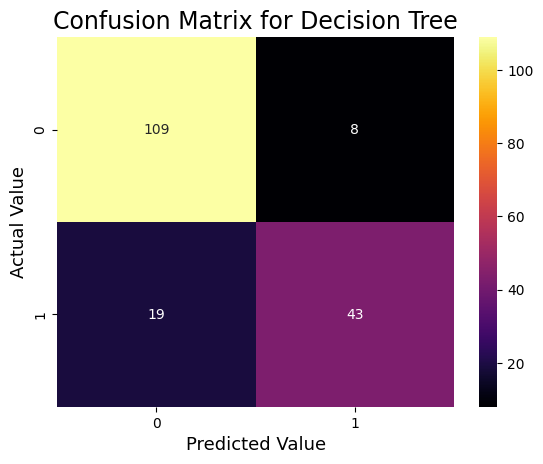

In [20]:
y_pred = Dt_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data = cm,annot = True , fmt = 'g',cmap ='inferno')
plt.xlabel('Predicted Value',fontsize = 13)
plt.ylabel('Actual Value',fontsize=13)
plt.title('Confusion Matrix for Decision Tree',fontsize = 17)
plt.show()
# Returns:
# Cndarray of shape (n_classes, n_classes)
# Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true
# label being i-th class and predicted label being j-th class.

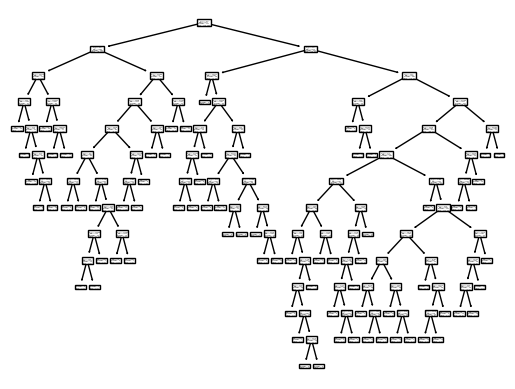

In [9]:
# Once trained, you can plot the tree with the plot_tree function:
tree.plot_tree(Dt_clf)
plt.show()

In [10]:
# dot_data = tree.export_graphviz(Dt_clf, out_file=None, 
#                       feature_names= titanic_ds.columns.tolist(),  
                        
#                       filled=True, rounded=True,  
#                       special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

In [11]:
# if we want to see the decision tree in the text format we can use export_text() function from 
# sklearn.tree
ex_tr_te = export_text(Dt_clf,feature_names = titanic_ds.columns.tolist())
print(ex_tr_te)

|--- Sex_male <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 26.12
|   |   |   |--- Age <= 23.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  23.50
|   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  27.50
|   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  37.00
|   |   |   |   |   |   |--- Fare <= 13.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Fare >  13.25
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- Fare >  26.12
|   |   |   |--- Fare <= 143.59
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  143.59
|   |   |   |   |--- Fare <= 188.10
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  188.10
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 24.81
|   |   |   |--- Age <= 29.85
|   |   |   |   |--- Age <= 29.35
|   |   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |   |--- Fare <= 1

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits


In [52]:

data = load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [24]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

value:  1
value:  2
value:  3
value:  4
value:  5
value:  6
value:  7
value:  8


<Figure size 640x480 with 0 Axes>

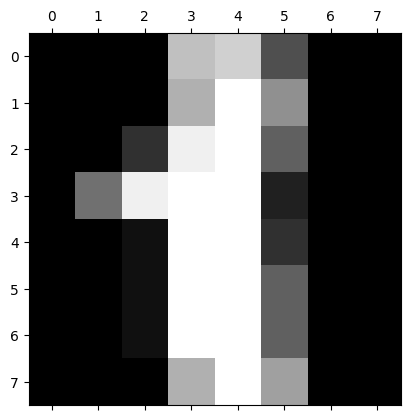

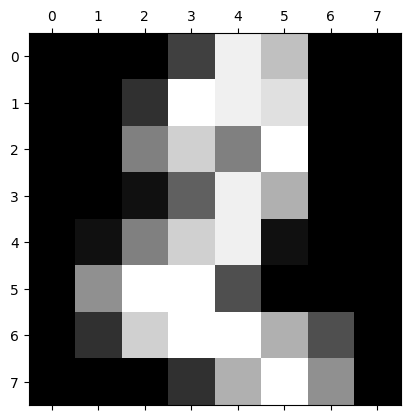

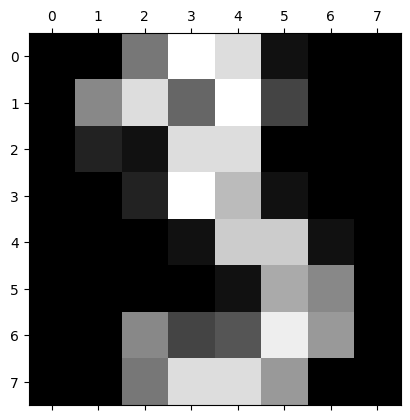

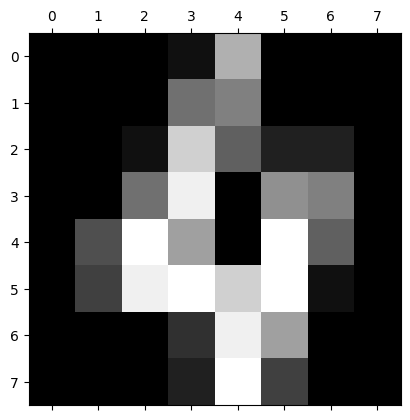

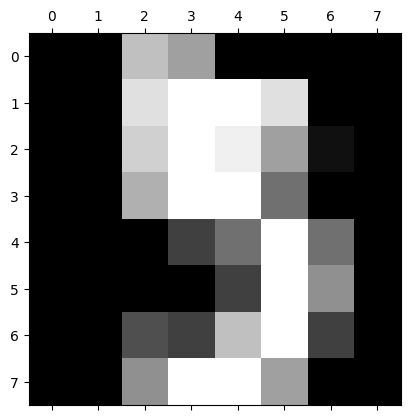

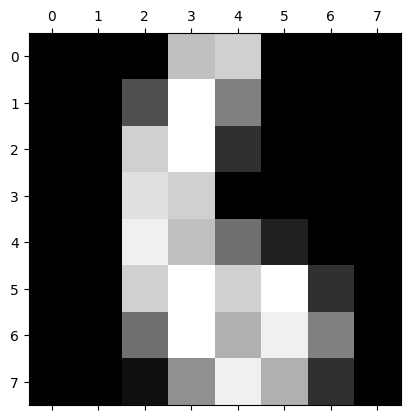

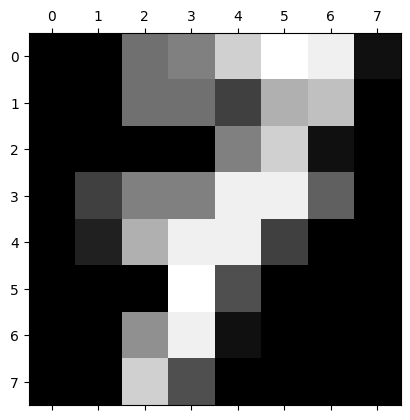

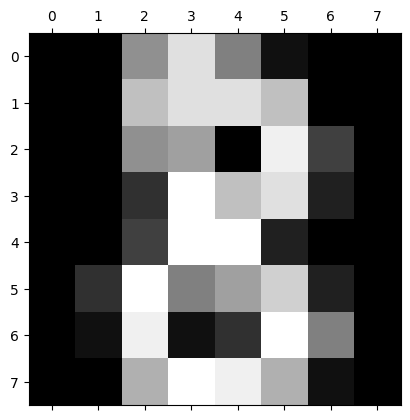

In [34]:
plt.gray()
for i in np.arange(1,9):
    print('value: ',data.target[i])
    plt.matshow(data.images[i])
    


In [35]:
df_digits = pd.DataFrame(data.data)
df_digits

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [37]:
df_digits['target'] = data.target
df_digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [88]:
X_train,X_test,y_train,y_test = train_test_split(df_digits.drop(columns=['target']),df_digits.target,
                                                 test_size=0.2,
                                                 random_state=10)

In [102]:
model = RandomForestClassifier(n_estimators=300,min_samples_leaf=1)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [104]:
model.score(X_test,y_test)
#model score with basic parameters = 96.67
#200 estimators = 96.44
#250 96.94
#300 97.22
#350 96.39
#min_samples_leaf-1(default) 3 - 96.11 2- 96.67 4-95.56 5-95

0.9694444444444444

In [105]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  1,  1,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 36]], dtype=int64)

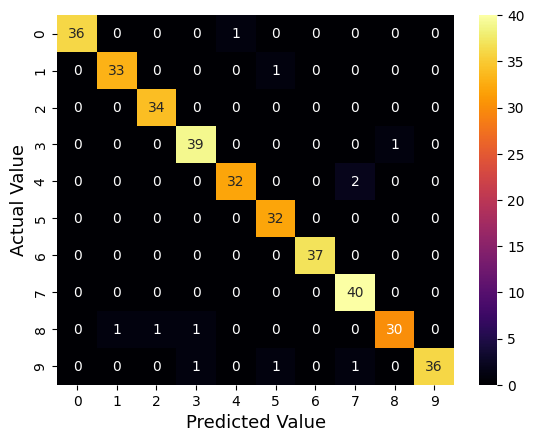

In [106]:
sns.heatmap(data = cm,annot = True,cmap='inferno')
plt.xlabel('Predicted Value',fontsize=13)
plt.ylabel('Actual Value',fontsize=13)
plt.show()